# 单元测试用例
 ## 目前包含内容
 - 串口驱动工作测试
 - 动作帧类实例化测试
 - 动作帧工厂实例化测试
 - 持久化缓存性能测试


## 串口驱动测试
- ### 内容：
    - 使用CloseLoopController开启信道，直接进行测试


In [ ]:
from repo.uptechStar.module.close_loop_controller import CloseLoopController
from repo.uptechStar.constant import MOTOR_DIRS, MOTOR_IDS

# 初始化需要使用
controller = CloseLoopController(motor_ids=MOTOR_IDS,
                                 motor_dirs=MOTOR_DIRS,
                                 port='COM1',
                                 debug=False)

controller.open_userInput_channel()


## ActionFrame类实例化测试
- ### 内容：
    - 使用ActionFrame的类构造器直接构造类实例
    - 使用ActionPlayer进行ActionFrame的播放，检验实例是否可以正常使用


In [ ]:
from repo.uptechStar.module.actions import ActionFrame, ActionPlayer

#动作帧内定义了一个最小的动作单元，可以通过多个动作帧的嵌套组合来实现复杂的链式动作
#动作帧内置了持久化缓存功能，会将生成过的动作帧加入缓存目录，下次相同的生成请求出现时会直接返回缓存对象


#创建动作帧播放器对象
player = ActionPlayer()

#向plyer播放队列中注入一个动作帧，并马上播放，这里未向动作帧对象初始化传递参数，代表停止动作帧
player.append(action=ActionFrame(),
              play_now=True)

#生成一个动作帧列表，这里实现的是一个以1000速度前进300ms后停止运动，无动作中断，动作过程中不挂起串口通信
tape = [ActionFrame(action_speed=(1000, 1000, 1000, 1000),
                    action_duration=300,
                    breaker_func=None,
                    break_action=None,
                    hang_time=0.),
        ActionFrame()]

#注入动作帧列表到播放队列，并马上播放
player.extend(actions=tape,
              play_now=True)

from time import sleep

#因为动作帧内置的串口发送线程是守护线程，会在主线程结束时立刻死亡，所以可能会存在数据未发送完毕的情况（
#让主线程等待1000ms
sleep(1)

## 使用ActionFrame工厂的类实例创建测试
- ### 内容：
    - 使用ActionFrame工厂构造ActionFrame类实例
    - 使用ActionPlayer进行ActionFrame的播放，检验实例是否可以正常使用

In [ ]:
from repo.uptechStar.module.actions import new_ActionFrame, ActionPlayer

"""
接下来使用动作帧工厂函数来生成动作帧
动作帧工厂生成相比与直接使用实例生成具有一些额外功能
1. 支持使用multiplier，动作速度和动作时间均可接受multiplier
2. 同时也具有持久化缓存的功能，与动作帧内置的持久化缓存逻辑是一致的，用来减少相同实例的创建时间
3. 支持3种不同方式的动作速度输入分别是【全轮控制】【左右轮组分别控制】【四轮分别控制】
4. 支持自动计算串口挂起时间,注意，这里不能手动直接给出具体的挂起时间，只能决定是否使用挂起，当未指定是否使用该功能时，会在未指定breaker时激活自动挂起的功能
"""

#创建动作帧播放器对象
player = ActionPlayer()

#动作帧工厂默认返回停止动作帧，这里会使得车辆停止
player.append(action=new_ActionFrame(),
              play_now=True)

#动作帧工厂的创建方式和直接使用类创建大体是类似的

#1.使用全轮控制的模式，直接给定一个整型便代表所有轮子的速度，轮子的速度为正会让车前进，为负会让车后退
player.append(action=new_ActionFrame(action_speed=2000,
                                     action_speed_multiplier=1.2,
                                     action_duration=500,
                                     action_duration_multiplier=1.2,
                                     breaker_func=None,
                                     break_action=None,
                                     hang_during_action=True),
              play_now=True)

#2.使用左右轮组分别控制，直接给定一个Tuple[int, int]便分别按次序代表左边轮组，右边轮组的速度，同理轮子的速度为正会让车前进，为负会让车后退
player.append(action=new_ActionFrame(action_speed=(2000, 2800),
                                     action_speed_multiplier=1.2,
                                     action_duration=500,
                                     action_duration_multiplier=1.2,
                                     breaker_func=None,
                                     break_action=None,
                                     hang_during_action=True),
              play_now=True)

#3.四轮分别控制，直接给定一个Tuple[int, int, int, int]便分别按次序代表fl,rl,rr,fr轮子的速度，同理轮子的速度为正会让车前进，为负会让车后退
player.append(action=new_ActionFrame(action_speed=(2000, 2800, 5000, 6000),
                                     action_speed_multiplier=1.2,
                                     action_duration=500,
                                     action_duration_multiplier=1.2,
                                     breaker_func=None,
                                     break_action=None,
                                     hang_during_action=True),
              play_now=True)

from time import sleep

#因为动作帧内置的串口发送线程是守护线程，会在主线程结束时立刻死亡，所以可能会存在数据未发送完毕的情况（
#让主线程等待1000ms
sleep(1)

## 持久化缓存装饰器测试
- ### 内容：
    - 使用persistent_cache进行函数结果的持久化缓存测试

2327
1092
611
859
145
1876
1192
2487
2113
8
2367
1854
1940
1649
1083
1945
2001
2072
273
2522
92
448
2240
228
840
1431
2194
136
1972
545
421
165
1584
116
2387
2068
1459
2336
991
468
1350
2038
2275
2475
2136
2227
1911
2259
2283
1158
1488
1439
365
477
1042
255
2455
1234
410
1640
1010
713
195
239
1453
1327
2457
1631
990
1252
2240
74
1777
940
1668
968
283
822
1510
2119
510
149
1896
145
748
1327
1673
1376
838
2505
2014
1638
2328
1176
2315
1176
426
1653
102
1344
733
2126
1074
1596
1253
1060
68
958
2276
605
2086
1870
1446
350
41
1743
2470
161
2512
540
1911
2222
66
431
648
1720
1769
2038
1581
1319
239
809
2394
537
754
646
354
2299
2167
1975
2508
826
1678
1459
1538
2248
2357
1846
2457
1137
2132
1674
1511
1367
725
1052
2228
167
269
1428
304
1744
2035
1998
1093
1833
1024
2262
2120
2346
444
749
175
19
2446
1665
2049
660
2145
2374
119
2549
2223
1338
1552
907
12
1492
1292
712
470
144
485
334
378
239
1034
2245
411
2283
39
919
1100
1993
1369
1720
282
1886
1067
359
1835
2225
1779
2311
1054
2371
997
2504

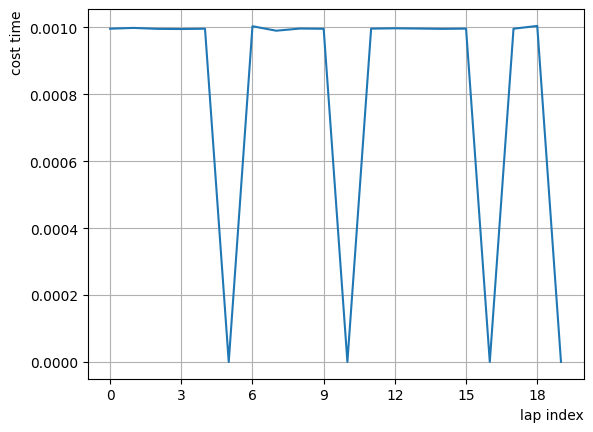

In [16]:
from matplotlib.ticker import MaxNLocator
import random
import time
from matplotlib import pyplot as plt
from repo.uptechStar.module.db_tools import persistent_cache, CacheFILE


#测试缓存的性能影响
@persistent_cache('cache')
def my_function(x):
    print("Calculating...")
    time.sleep(0.01)
    return x + 1


def learning_curve(function=my_function, multiplier: int = 2, laps: int = 20):
    op_durations_list = []

    for _ in range(laps):
        start_time = time.time()
        for i in range(256):
            # 第一次调用会计算并缓存结果
            print(function(random.randint(0, 256 * multiplier)))
        op_durations_list.append(time.time() - start_time)
    plt.plot(range(laps), op_durations_list)
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel(xlabel='lap index', loc='right')
    plt.ylabel(ylabel='cost time', loc='top')
    plt.grid(visible=True)
    plt.show()


learning_curve(multiplier=10)

# 将内存中的缓存对象保存到硬盘
CacheFILE.save_all_cache()
